In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt



Amount of missing data in 'rad(m)' column for JAN19: 48
Amount of missing data in 'rad(m)' column for JAN19: 0
Amount of missing data in 'rad(m)' column for FEB19: 78
Amount of missing data in 'rad(m)' column for FEB19: 0
Amount of missing data in 'rad(m)' column for MAR19: 41
Amount of missing data in 'rad(m)' column for MAR19: 0
Amount of missing data in 'rad(m)' column for APR19: 1
Amount of missing data in 'rad(m)' column for APR19: 0
Amount of missing data in 'rad(m)' column for JUN19: 7
Amount of missing data in 'rad(m)' column for JUN19: 0
Amount of missing data in 'rad(m)' column for JUL19: 3
Amount of missing data in 'rad(m)' column for JUL19: 0
Amount of missing data in 'rad(m)' column for SEP19: 9
Amount of missing data in 'rad(m)' column for SEP19: 0
Amount of missing data in 'rad(m)' column for OCT19: 16
Amount of missing data in 'rad(m)' column for OCT19: 0
Amount of missing data in 'rad(m)' column for NOV19: 4
Amount of missing data in 'rad(m)' column for NOV19: 0
Amount

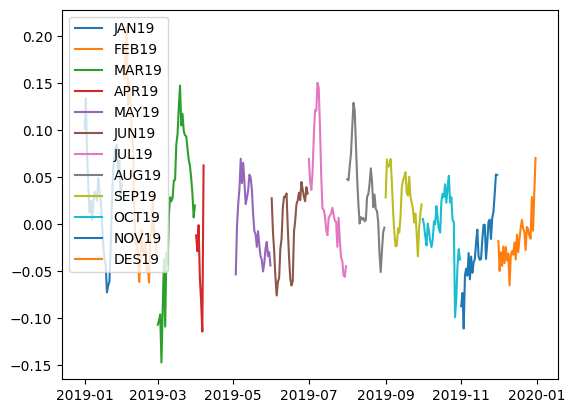

In [11]:
cwd = os.getcwd()

# listSheet = ['JAN']
listSheet = ['JAN19', 'FEB19' ,'MAR19', 'APR19', 'MAY19', 'JUN19', 'JUL19', 'AUG19', 'SEP19', 'OCT19', 'NOV19', 'DES19']
listRadNorm = [4.78, 4.66, 4.75, 4.79, 4.67, 4.59,4.52,4.46, 4.45, 4.5,4.53, 4.61]
listDailyAverage = []

for sheet in listSheet:
    file_path = os.path.join(cwd, f"{sheet}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df = df.drop(columns=['prs(m)'])
        df['rad(m)'] = pd.to_numeric(df['rad(m)'], errors='coerce')
        df['rad(m)'] = df['rad(m)'] - listRadNorm[listSheet.index(sheet)]
        if df['rad(m)'].isnull().any():
            missing_count = df['rad(m)'].isnull().sum()
            print(f"Amount of missing data in 'rad(m)' column for {sheet}: {missing_count}")
            df['rad(m)'] = df['rad(m)'].fillna(df['rad(m)'].mean())
            missing_count = df['rad(m)'].isnull().sum()
            print(f"Amount of missing data in 'rad(m)' column for {sheet}: {missing_count}")
        df['Time (UTC)'] = pd.to_datetime(df['Time (UTC)'], errors='coerce')
        df['Date'] = df['Time (UTC)'].dt.date
        daily_average = df.groupby('Date').mean().reset_index()
        listDailyAverage.append(daily_average)
        # Save the daily averages to a new CSV file
        
    else:
        print(f"File {sheet}.csv does not exist")

#export listDailyAverage into only one csv file
df = pd.concat(listDailyAverage)
df.to_csv('daily_average.csv', index=False)

#visualisasi
print(len(listDailyAverage))
fig, ax = plt.subplots()
for i in range(len(listDailyAverage)):
    ax.plot(listDailyAverage[i]['Date'], listDailyAverage[i]['rad(m)'], label=listSheet[i])
plt.legend()
plt.show()



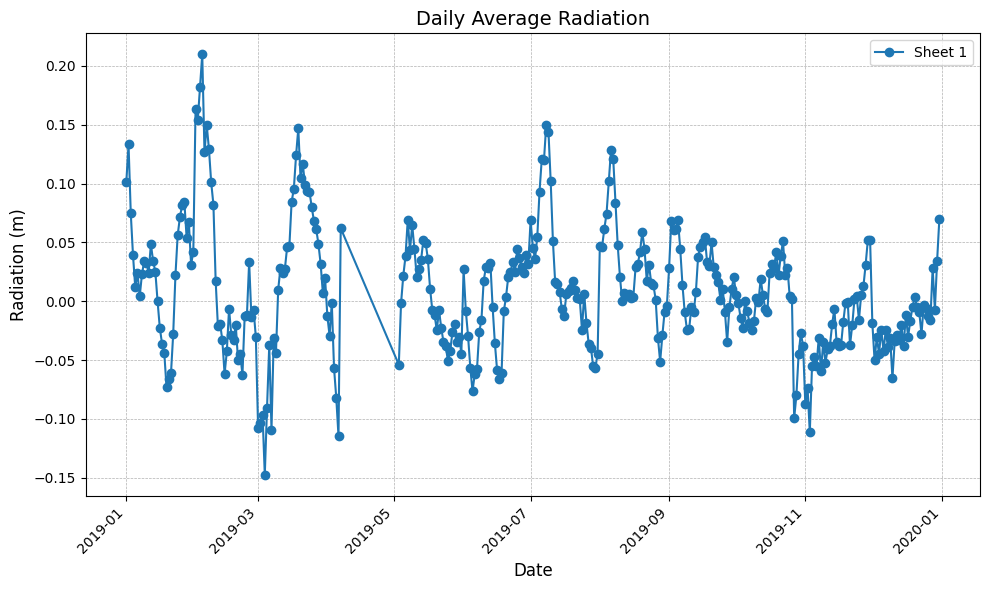

In [12]:
# Membaca data dari file CSV
df_daily_average = pd.read_csv('daily_average.csv')

# Pastikan kolom 'Date' diubah menjadi datetime
df_daily_average['Date'] = pd.to_datetime(df_daily_average['Date'])

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))  # Menyesuaikan ukuran plot

# Misalnya, jika Anda ingin memplotkan data dari beberapa sheet (listDailyAverage[i] dan listSheet[i])
# Untuk sekarang, kita gunakan contoh df_daily_average yang sudah dibaca sebelumnya
ax.plot(df_daily_average['Date'], df_daily_average['rad(m)'], label="Sheet 1", color='tab:blue', linestyle='-', marker='o')

# Menambahkan label sumbu X dan Y
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Radiation (m)', fontsize=12)

# Menambahkan judul
ax.set_title('Daily Average Radiation', fontsize=14)

# Menambahkan grid untuk mempermudah pembacaan grafik
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Menambahkan legenda
ax.legend()

# Memutar sumbu X agar tanggal lebih terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.tight_layout()  # Untuk menyesuaikan elemen-elemen agar tidak terpotong
plt.show()

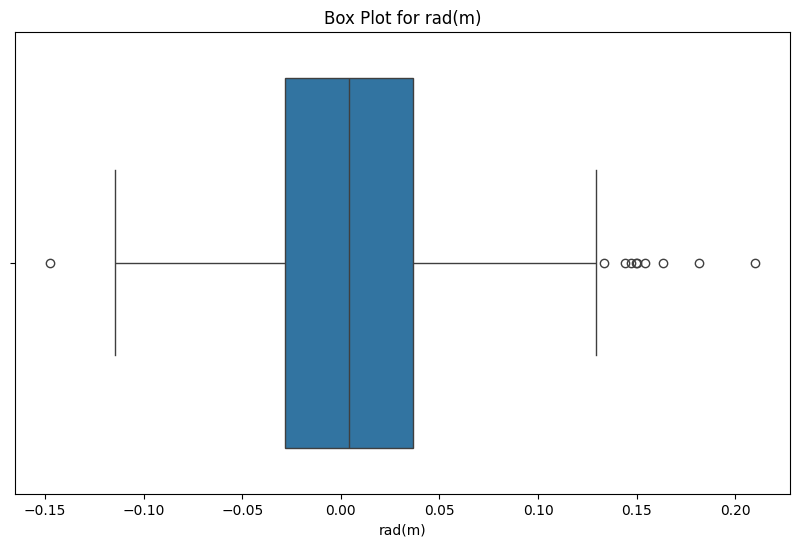

In [13]:
import seaborn as sns

# Membuat box plot untuk memeriksa outlier pada kolom 'rad(m)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_daily_average['rad(m)'])
plt.title('Box Plot for rad(m)')
plt.show()
